#**1. Import libraries and data**

In [3]:
%%capture
!pip install shap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.linear_model import Lasso

In [4]:
df = pd.read_excel ('/content/df_wheat_.xlsx')

#**2. Data analysis**

#**2.1 General information and statistics**

***The period of analysis is:*** 2003.04.29 - 2022.05.12

***The data consist*** of the dates regarding wheat prices and five factors (Brent oil price, Pork price, Gold price, Steel price, Russian-Ukrainian conflict).

Brent oil price, Pork price, Gold price, Steel price are the prices of these products. The beginning of the conflict between Ukraine and Russia is indicated by the conditional 1



***The sourse*** of data is https://www.investing.com/

In [5]:
print('First 5 rows:\n')
df.head()

First 5 rows:



,Date,Wheat price,Brent oil price,Pork price,Gold price,Steel price,Russian-Ukrainian conflict
0,2022-05-12,1174.50,107.45,100.10,1824.6,1380.0,1
1,2022-05-11,1108.75,107.51,100.92,1853.7,1390.0,1
2,2022-05-10,1083.25,102.46,101.08,1841.0,1363.0,1
3,2022-05-09,1092.75,105.94,100.88,1858.6,1365.0,1
4,2022-05-06,1108.50,112.39,102.20,1882.8,1378.0,1


In [6]:
print('Last 5 rows:\n')
df.tail()

Last 5 rows:



,Date,Wheat price,Brent oil price,Pork price,Gold price,Steel price,Russian-Ukrainian conflict
4576,2003-05-07,296.0,24.11,58.08,341.9,450.0,0
4577,2003-05-06,287.0,23.57,58.90,342.5,450.0,0
4578,2003-05-02,277.5,23.52,58.45,341.0,450.0,0
4579,2003-04-30,279.5,23.68,57.95,339.1,450.0,0
4580,2003-04-29,280.0,23.26,58.23,333.7,455.0,0


In [7]:
print (f'The number of rows: {df.shape [0]} \nThe number of columns: {df.shape [1]}')

The number of rows: 4581 
The number of columns: 7


In [8]:
df.loc[df['Date'].between("2022-02-20", "2022-02-28")]

,Date,Wheat price,Brent oil price,Pork price,Gold price,Steel price,Russian-Ukrainian conflict
50,2022-02-28,928.00,100.99,103.50,1900.7,1056.0,1
51,2022-02-25,843.00,97.93,103.67,1887.6,1010.0,1
52,2022-02-24,926.00,99.08,105.53,1925.4,994.0,1
53,2022-02-23,876.00,96.84,108.03,1909.4,990.0,0
54,2022-02-22,844.25,96.84,112.08,1906.4,1117.0,0


In [9]:
print ('The basic statistics \n')
df.iloc[:,1:6].describe()

The basic statistics 



,Wheat price,Brent oil price,Pork price,Gold price,Steel price
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,556.320186,71.695610,73.836531,1161.135713,654.415957
std,170.560472,26.458233,15.950789,448.665174,272.066580
min,277.500000,19.330000,37.330000,333.700000,364.000000
25%,438.250000,51.730000,62.350000,808.100000,510.000000
50%,518.880000,66.940000,70.830000,1245.300000,598.000000
75%,661.130000,92.700000,83.550000,1471.400000,668.000000
max,1425.250000,146.080000,133.880000,2054.600000,1945.000000


##**2.2 Data visualization**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


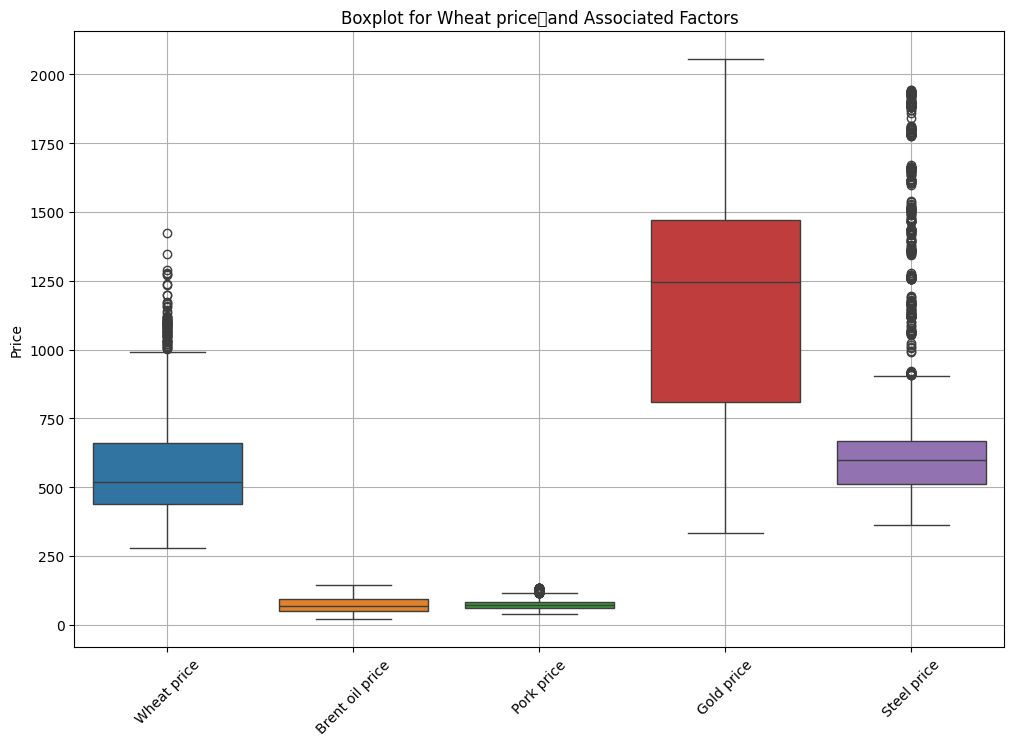

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:,1:6])
plt.title('Boxplot for Wheat price	and Associated Factors')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid (True)
plt.show()

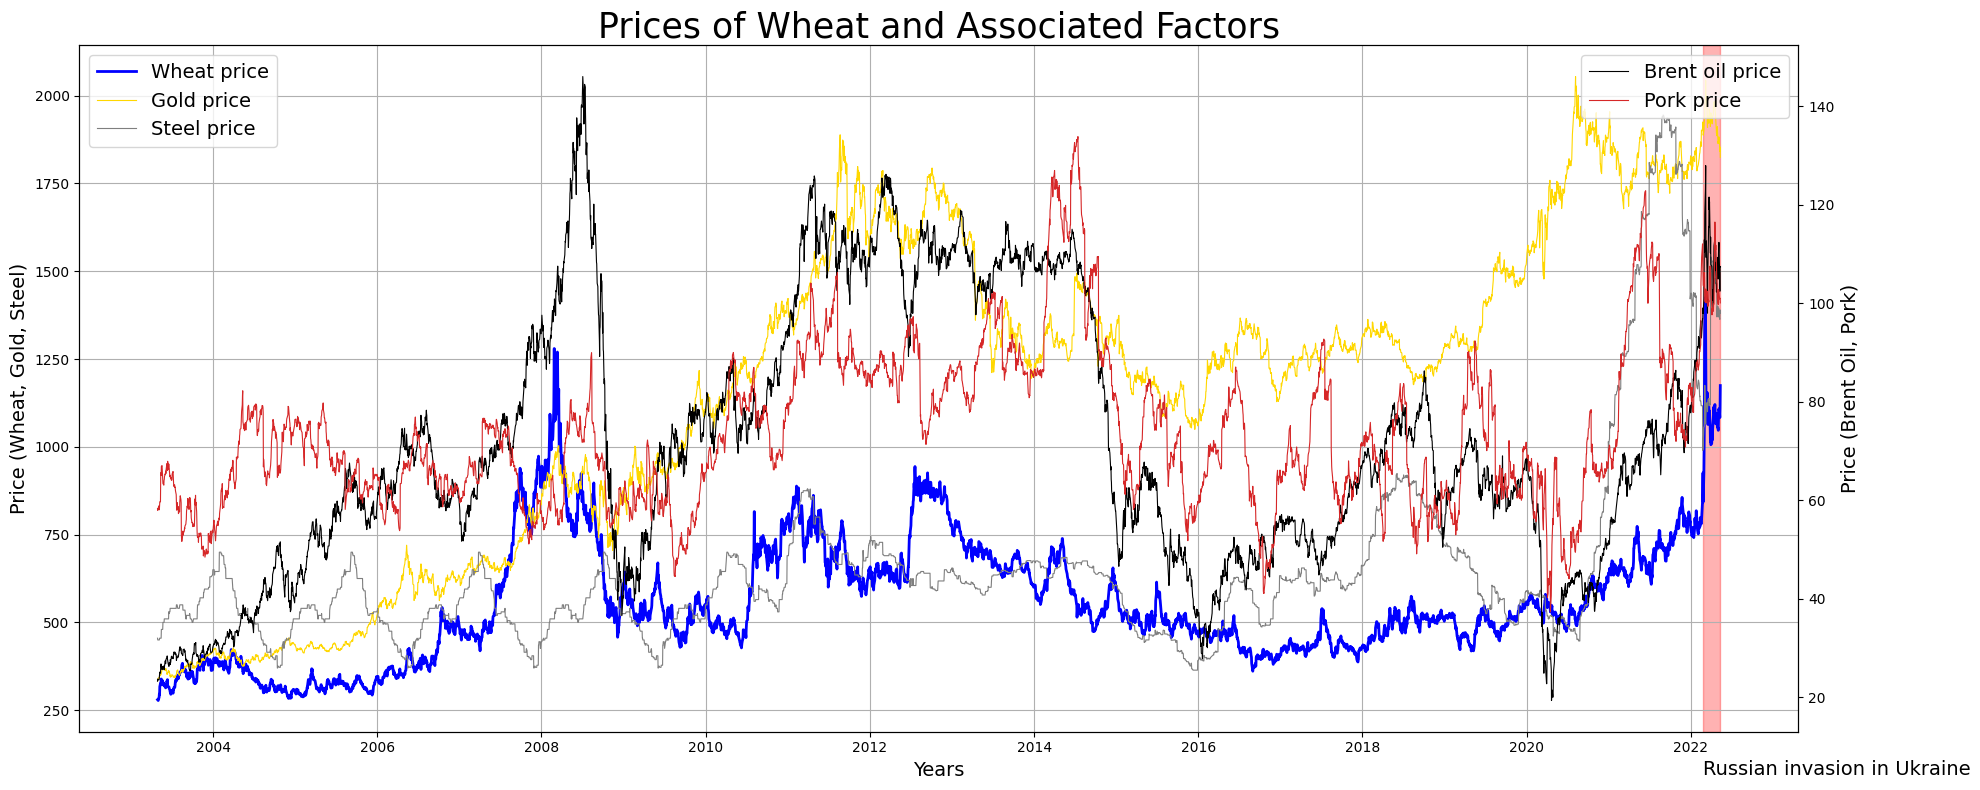

In [11]:
fig, ax1 = plt.subplots(figsize=(20, 8))

linewidth = 0.8
# Left - Wheat price, Gold price, Steel price
ax1.set_xlabel('Years', fontsize = 14)
ax1.set_ylabel('Price (Wheat, Gold, Steel)', color='black', fontsize = 14)
ax1.plot(df['Date'], df['Wheat price'], color='blue', label='Wheat price', linewidth=2)
ax1.plot(df['Date'], df['Gold price'], color='gold', label='Gold price', linewidth=linewidth)
ax1.plot(df['Date'], df['Steel price'], color='tab:grey', label='Steel price', linewidth=linewidth)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', fontsize=14)

# Right - Brent oil price, Pork price
ax2 = ax1.twinx()
ax2.set_ylabel('Price (Brent Oil, Pork)', color='black', fontsize = 14)
ax2.plot(df['Date'], df['Brent oil price'], color='black', linestyle='-', label='Brent oil price', linewidth=linewidth)
ax2.plot(df['Date'], df['Pork price'], color='tab:red', linestyle='-', label='Pork price', linewidth=linewidth)
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right', fontsize = 14)
ax1.grid(True)

# Background
df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.to_datetime("2022-02-24")  # Convert start date to datetime
end_date = df['Date'].iloc[0]
ax1.axvspan(start_date, end_date, color='red', alpha=0.3)
ax1.text(start_date, ax1.get_ylim()[1]*0.03, "Russian invasion in Ukraine", fontsize=14, color='black')

# Title
plt.title('Prices of Wheat and Associated Factors', fontsize = 25)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

#**3. Data pre-processing**

In [12]:
# Checking empty values
df.isnull().sum()

Date                          0
Wheat price                   0
Brent oil price               0
Pork price                    0
Gold price                    0
Steel price                   0
Russian-Ukrainian conflict    0
dtype: int64

In [13]:
# Checking the Data Format for Correctness
df.dtypes

Date                          datetime64[ns]
Wheat price                          float64
Brent oil price                      float64
Pork price                           float64
Gold price                           float64
Steel price                          float64
Russian-Ukrainian conflict             int64
dtype: object

***Conclusion:*** All data formats are correct. There are no empty data, and no anomalies were detected early on.

In [14]:
# Distribution of the sample into test and training
y = df['Wheat price']
X = df[['Brent oil price', 'Pork price', 'Gold price', 'Steel price', 'Russian-Ukrainian conflict']]
X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.2, random_state = 4)

#**4. Assessing the influence of Features on the Wheat price**

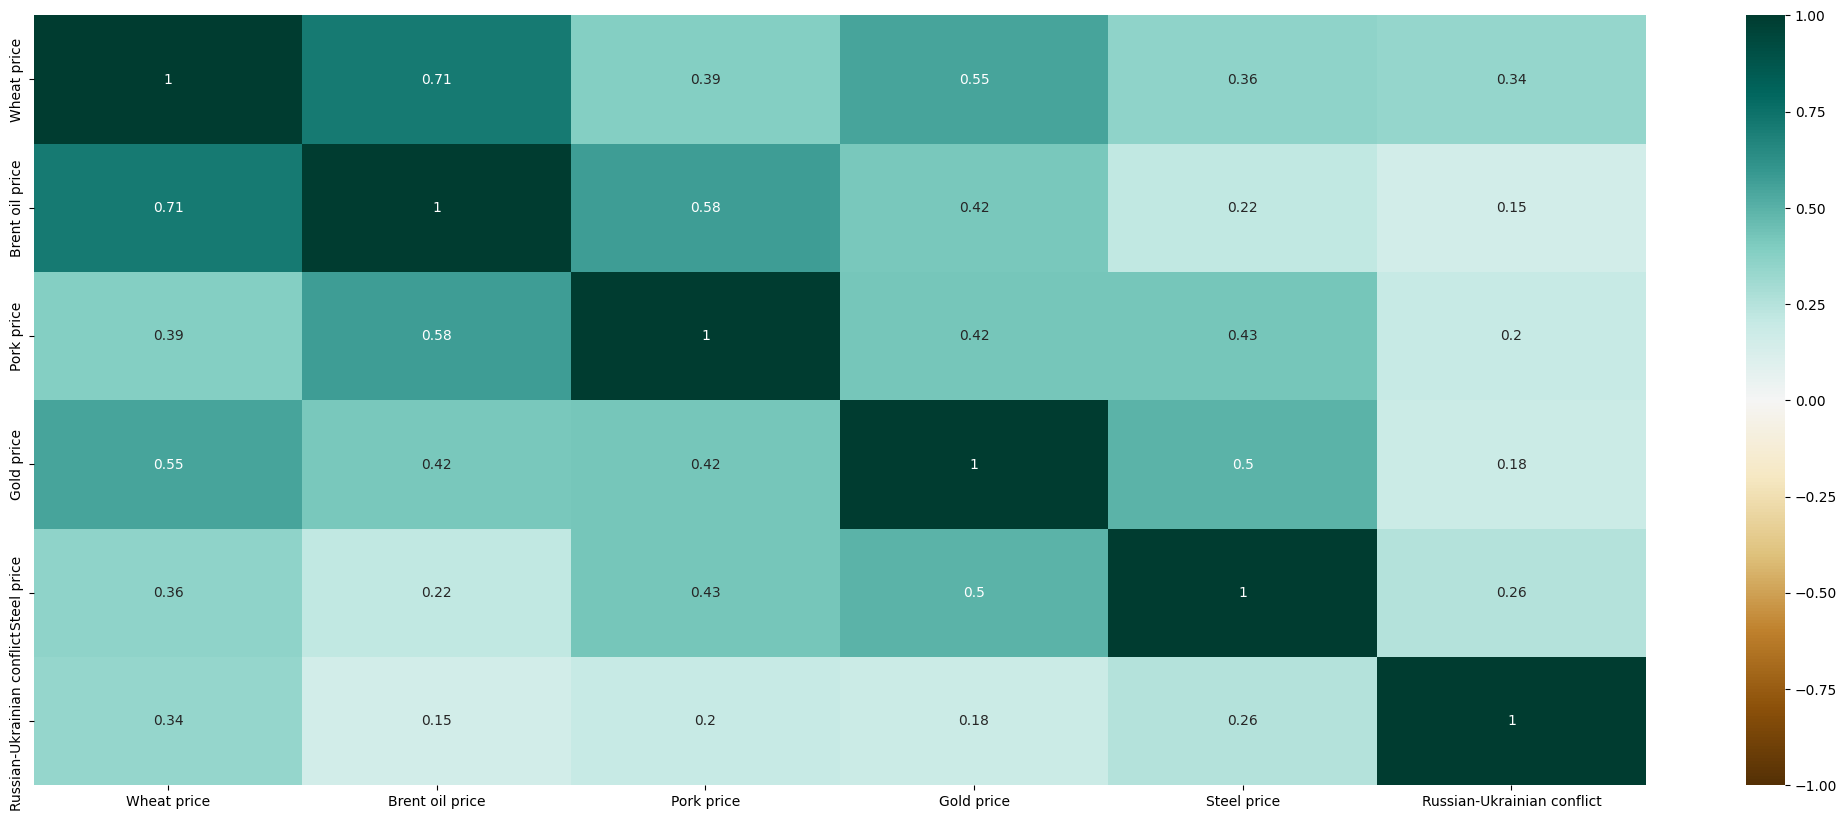

In [15]:
# Pirson correlation
plt.figure(figsize=(26, 10))
sns.heatmap(df.iloc[:,1:7].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show ()

There are strong correlation between wheat price and Oil prices and gold prices. Also, we can see weak correlation with steel prices, pork prices and ukraine-russian war

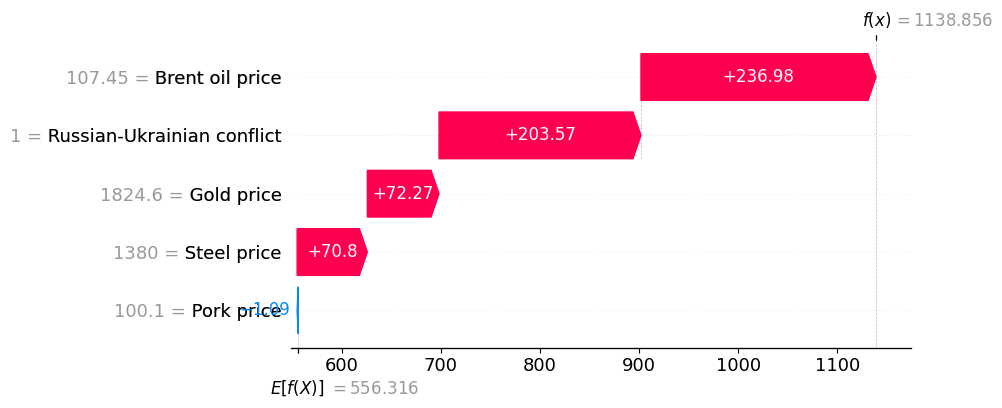

In [16]:
# SHARP Model
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

***Conclusion:*** According to the results, the Russian-Ukrainian war is increasing the price of wheat to over $203.57. Furthermore, based on correlation and SHARP analysis, it will be proved that all factors have influence on Wheat Prices

#**5. Polinomial linear regression and Lasso regression**

For the better results it is rationally use normalization with MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Polinomial regression without normalization
x = []
y = []
for i in range (1,9):
  poly = PolynomialFeatures (degree = i)
  train_x_poly = poly.fit_transform (X_train)
  train_x_poly
  clf = linear_model.LinearRegression()
  train_y_ = clf.fit (train_x_poly, Y_train)
  test_x_poly =poly.fit_transform (X_test)
  test_y_ = clf.predict (test_x_poly)
  y.append (r2_score (Y_test, test_y_))
  x.append (i)
  print(i, r2_score (Y_test, test_y_))

1 0.632720970101379
2 0.7180801331585966
3 0.8282316387000791
4 0.8708276717725528
5 0.383834034383687
6 0.5536786088073772
7 -0.9957558225065819
8 -1.5445019165042053


In [19]:
#Polinomial regression with normalization
x = []
y = []
for i in range (1,9):
  poly = PolynomialFeatures (degree = i)
  train_x_poly = poly.fit_transform (X_train_scaled)
  train_x_poly
  clf = linear_model.LinearRegression()
  train_y_ = clf.fit (train_x_poly, Y_train)
  test_x_poly =poly.fit_transform (X_test_scaled)
  test_y_ = clf.predict (test_x_poly)
  y.append (r2_score (Y_test, test_y_))
  x.append (i)
  print(i, r2_score (Y_test, test_y_))



1 0.632720970101379
2 0.7180801331585209
3 0.8282047715146768
4 0.8648171339379386
5 0.7664465133909818
6 0.8719037744832527
7 0.8518203456640489
8 0.5810821676802873


In [20]:
lasso_r2_scores = []

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(X_train)
    test_x_poly = poly.transform(X_test)
    lasso = Lasso(alpha=0.25)
    lasso.fit(train_x_poly, Y_train)
    test_y_pred = lasso.predict(test_x_poly)
    r2 = r2_score(Y_test, test_y_pred)
    lasso_r2_scores.append(r2)
    print(f"Degree {degree}: R^2 score = {r2}")

best_degree = degrees[np.argmax(lasso_r2_scores)]
print(f"Best degree: {best_degree}, R^2 score: {np.max(lasso_r2_scores)}")

Degree 1: R^2 score = 0.6326430431775745
Degree 2: R^2 score = 0.71824914113284


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e+07, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+07, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 3: R^2 score = 0.7550125031381268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+07, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 4: R^2 score = 0.7926836839897082


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+07, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 5: R^2 score = 0.8200368193633688


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.784e+06, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 6: R^2 score = 0.8317434670889039


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.533e+06, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 7: R^2 score = 0.8363647401308106


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.383e+06, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 8: R^2 score = 0.8386743636448081


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.245e+06, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 9: R^2 score = 0.8413560291484885


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.771e+06, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 12: R^2 score = 0.8516226976112077
Degree 15: R^2 score = 0.8575822119698753
Best degree: 15, R^2 score: 0.8575822119698753


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.378e+06, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


In [21]:
lasso_r2_scores = []

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(X_train_scaled)
    test_x_poly = poly.transform(X_test_scaled)
    lasso = Lasso(alpha=0.25)
    lasso.fit(train_x_poly, Y_train)
    test_y_pred = lasso.predict(test_x_poly)
    r2 = r2_score(Y_test, test_y_pred)
    lasso_r2_scores.append(r2)
    print(f"Degree {degree}: R^2 score = {r2}")

best_degree = degrees[np.argmax(lasso_r2_scores)]
print(f"Best degree: {best_degree}, R^2 score: {np.max(lasso_r2_scores)}")

Degree 1: R^2 score = 0.6331039921827918
Degree 2: R^2 score = 0.6856076004474473


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.069e+04, tolerance: 1.073e+04
  model = cd_fast.enet_coordinate_descent(


Degree 3: R^2 score = 0.6987390113146124
Degree 4: R^2 score = 0.7156977561817772
Degree 5: R^2 score = 0.7273765930579681
Degree 6: R^2 score = 0.7307194378356285
Degree 7: R^2 score = 0.7310328676892326
Degree 8: R^2 score = 0.7310430123357237
Degree 9: R^2 score = 0.7310421335731165
Degree 12: R^2 score = 0.7310421335731165
Degree 15: R^2 score = 0.7310421335731165
Best degree: 8, R^2 score: 0.7310430123357237


***Conclussion***: The best model is Polynomial regression with normalization (6 polynomials)

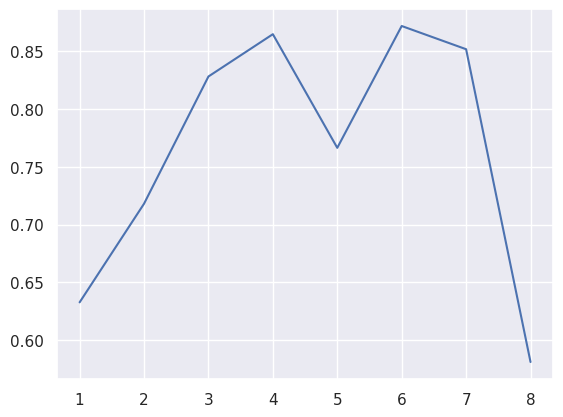

In [22]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=x, y=y)
plt.show()

In [23]:
# Сoefficients
poly = PolynomialFeatures (degree = 6)
train_x_poly = poly.fit_transform (X_train_scaled)
train_x_poly
clf = linear_model.LinearRegression()
train_y_ = clf.fit (train_x_poly, Y_train)
test_x_poly =poly.fit_transform (X_test_scaled)
test_y_ = clf.predict (test_x_poly)
print ("Coef: ", clf.coef_)
print ("Inercept: ", clf.intercept_)

Coef:  [-1.76531861e+15  9.57802840e+03  1.58018369e+04 -7.12954950e+03
  3.91462064e+03  1.61281073e+05 -7.70704158e+03 -5.36917769e+04
  4.45611983e+03 -1.28922193e+05 -3.42331876e+05 -6.84954257e+04
 -4.58307845e+04  6.75808338e+04  1.95430427e+05  8.60336586e+04
  7.00413650e+04 -1.52459141e+05 -1.01256710e+04 -4.18699365e+05
  1.61281073e+05 -8.60100240e+04  1.63640258e+05  1.16036098e+05
  1.45784299e+05  9.43628181e+05  1.90254800e+05 -1.09744434e+05
  1.03130196e+05 -5.60086387e+05 -1.29944782e+05 -1.38065046e+05
 -4.32812915e+05  1.02990993e+06  1.04110998e+06 -3.42331876e+05
  1.17134478e+05  1.59276459e+05 -3.20457149e+05 -1.62707146e+05
  1.25355527e+05  2.54071010e+05  1.25389195e+05 -2.39483045e+05
 -1.03062961e+04  1.95430426e+05 -2.80918815e+05 -4.01213736e+05
 -1.10637579e+05 -3.32153903e+05 -7.19264042e+04 -1.52459141e+05
 -1.15476565e+05  4.07591894e+05 -4.18699364e+05  1.61281073e+05
 -5.42301179e+04  1.16906149e+05  6.36622124e+05  7.71748741e+05
 -2.88397691e+05 -

#**6. Classification algorithms (ML) for predicting the rise or fall of wheat prices**

***Data preparation***

In [24]:
# Function for converting data to categorical
def convert_target_to_categorical(y):
    y1 = []
    for i in range(1, len(y)):
        if y[i] > y[i - 1]:
            y1.append(1)
        else:
            y1.append(0)
    return y1
def convert_features_to_categorical(X):
    X1 = []
    for i in range(1, len(X)):
        z = 1 if X[i][0] > X[i - 1][0] else 0
        c = 1 if X[i][1] > X[i - 1][1] else 0
        v = 1 if X[i][2] > X[i - 1][2] else 0
        b = 1 if X[i][3] > X[i - 1][3] else 0
        e = 1 if X[i][4] > X[i - 1][4] else 0
        X1.append([z, c, v, b, e])
    return X1

In [25]:
y = df['Wheat price'].values
X = df[['Brent oil price', 'Pork price', 'Gold price', 'Steel price', 'Russian-Ukrainian conflict']].values
y_categorical = convert_target_to_categorical(y)
X_categorical = convert_features_to_categorical(X)

In [26]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split (X_categorical, y_categorical, test_size = 0.2, random_state = 4)

***Logistic regression***

In [27]:
parameters ={'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [28]:
lr = LogisticRegression()
logreg_cv= GridSearchCV(lr, parameters, cv=50)
logreg_cv.fit(X_train_c, Y_train_c)
print("The best solution :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

The best solution :(best parameters)  {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.55238059977786


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [29]:
print ('Assessing the quality of a logistic regression model')
yhat_lr=logreg_cv.predict(X_test_c)
print ('accuracy score: ', metrics.accuracy_score (Y_test_c, yhat_lr))
print ('jaccard score: ',metrics.jaccard_score (Y_test_c, yhat_lr))
print ('F1 score: ',metrics.f1_score (Y_test_c, yhat_lr))
print ('log loss: ',log_loss(Y_test_c, yhat_lr))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_c, yhat_lr))
print ('TNR: ',metrics.precision_score (Y_test_c, yhat_lr))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_c, yhat_lr))

Assessing the quality of a logistic regression model
accuracy score:  0.5021834061135371
jaccard score:  0.32644017725258495
F1 score:  0.4922048997772829
log loss:  17.943128761394565
roc auc score:  0.5044423734078907
TNR:  0.5299760191846523
balanced accuracy score:  0.5044423734078907


In [30]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,fmt="d", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

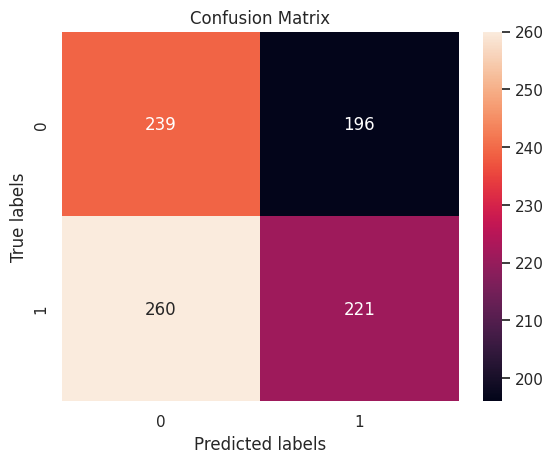

In [31]:
plot_confusion_matrix (Y_test_c, yhat_lr)

***Knn***

In [32]:
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute', 'brute-force', 'cover_tree', 'annoy', 'hnsw'],
    'p': [1, 2],
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 40]
}

In [33]:
KNN = KNeighborsClassifier()
knn_cv= GridSearchCV(KNN, parameters, cv=10, verbose=4)
knn_cv.fit(X_train_c, Y_train_c)
print("Best solution:(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[CV 1/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.518 total time=   0.0s
[CV 2/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.474 total time=   0.0s
[CV 3/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.518 total time=   0.0s
[CV 4/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.478 total time=   0.0s
[CV 6/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.503 total time=   0.0s
[CV 7/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.514 total time=   0.0s
[CV 8/10] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform;, score=0.536 total time=   0.0s
[CV 9/10] END algorithm=auto, l

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2400 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages

In [34]:
print ('Evaluation the quality of a Knn model')
yhat_Knn=knn_cv.predict(X_test_c)
print ('accuracy score: ', metrics.accuracy_score (Y_test_c, yhat_Knn))
print ('jaccard score: ',metrics.jaccard_score (Y_test_c, yhat_Knn))
print ('F1 score: ',metrics.f1_score (Y_test_c, yhat_Knn))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_c, yhat_Knn))
print ('TNR: ',metrics.precision_score (Y_test_c, yhat_Knn))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_c, yhat_Knn))

Evaluation the quality of a Knn model
accuracy score:  0.4836244541484716
jaccard score:  0.22075782537067545
F1 score:  0.3616734143049933
roc auc score:  0.4944655530862428
TNR:  0.5153846153846153
balanced accuracy score:  0.49446555308624274


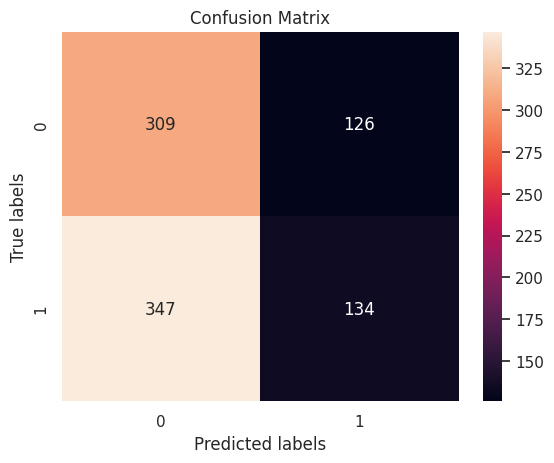

In [35]:
plot_confusion_matrix (Y_test_c, yhat_Knn)

***Support vector machine***

In [36]:
parameters = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 'auto'],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'] }


In [37]:
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train_c, Y_train_c)
best_params = svm_cv.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


In [40]:
from sklearn.svm import SVC
from sklearn import metrics

In [42]:
yhat_svm = svm_cv.predict(X_test_c)

In [44]:
print ('Evaluation the quality of a SVM model')
yhat_svm = svm_cv.predict(X_test_c)
print ('accuracy score: ', metrics.accuracy_score (Y_test_c, yhat_svm))
print ('jaccard score: ',metrics.jaccard_score (Y_test_c, yhat_svm))
print ('F1 score: ',metrics.f1_score (Y_test_c, yhat_svm))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_c, yhat_svm))
print ('TNR: ',metrics.precision_score (Y_test_c, yhat_svm))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_c, yhat_svm))

Evaluation the quality of a SVM model
accuracy score:  0.5065502183406113
jaccard score:  0.33234859675036926
F1 score:  0.4988913525498892
roc auc score:  0.5086003775658948
TNR:  0.5344418052256532
balanced accuracy score:  0.5086003775658948


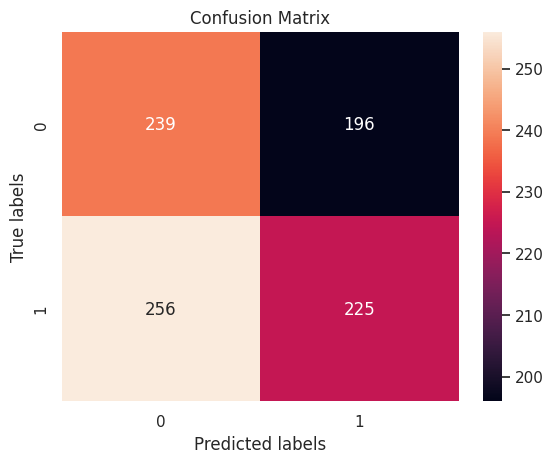

In [45]:
plot_confusion_matrix (Y_test_c, yhat_svm)

***Random forest***

In [46]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_c, Y_train_c)
print ("Best solution :(best parameters) ", CV_rfc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best solution :(best parameters)  {'max_features': 'log2'}


In [47]:
print ('Evaluation the quality of Random forest')
yhat_rfc=CV_rfc.predict(X_test_c)
print ('accuracy score: ', metrics.accuracy_score (Y_test_c, yhat_rfc))
print ('jaccard score: ',metrics.jaccard_score (Y_test_c, yhat_rfc))
print ('F1 score: ',metrics.f1_score (Y_test_c, yhat_rfc))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_c, yhat_rfc))
print ('TNR: ',metrics.precision_score (Y_test_c, yhat_rfc))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_c, yhat_rfc))

Evaluation the quality of Random forest
accuracy score:  0.4923580786026201
jaccard score:  0.3141592920353982
F1 score:  0.4781144781144782
roc auc score:  0.49497693980452606
TNR:  0.5195121951219512
balanced accuracy score:  0.49497693980452606


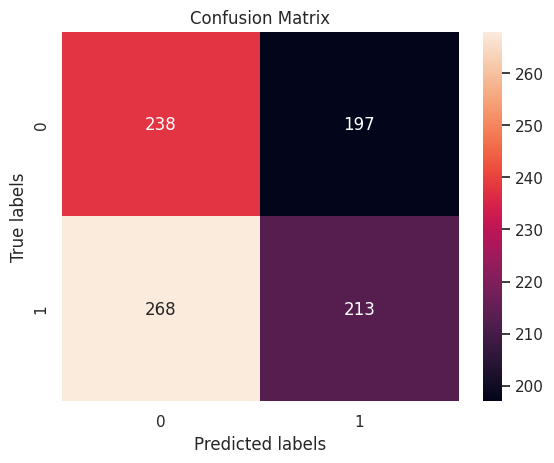

In [48]:
plot_confusion_matrix (Y_test_c, yhat_rfc)

In [50]:
metrics_dict = {
    'Logistic Regression': [metrics.accuracy_score(Y_test_c, yhat_lr),
                            metrics.jaccard_score(Y_test_c, yhat_lr),
                            metrics.f1_score(Y_test_c, yhat_lr),
                            log_loss(Y_test_c, yhat_lr),
                            metrics.roc_auc_score(Y_test_c, yhat_lr),
                            metrics.precision_score(Y_test_c, yhat_lr),
                            metrics.balanced_accuracy_score(Y_test_c, yhat_lr)],

    'KNN': [metrics.accuracy_score(Y_test_c, yhat_Knn),
            metrics.jaccard_score(Y_test_c, yhat_Knn),
            metrics.f1_score(Y_test_c, yhat_Knn),
            None, # KNN doesn't have log loss
            metrics.roc_auc_score(Y_test_c, yhat_Knn),
            metrics.precision_score(Y_test_c, yhat_Knn),
            metrics.balanced_accuracy_score(Y_test_c, yhat_Knn)],

    'SVM': [metrics.accuracy_score(Y_test_c, yhat_svm),
            metrics.jaccard_score(Y_test_c, yhat_svm),
            metrics.f1_score(Y_test_c, yhat_svm),
            None, # SVM doesn't have log loss
            metrics.roc_auc_score(Y_test_c, yhat_svm),
            metrics.precision_score(Y_test_c, yhat_svm),
            metrics.balanced_accuracy_score(Y_test_c, yhat_svm)],

    'Random Forest': [metrics.accuracy_score(Y_test_c, yhat_rfc),
                      metrics.jaccard_score(Y_test_c, yhat_rfc),
                      metrics.f1_score(Y_test_c, yhat_rfc),
                      None, # Random Forest doesn't have log loss
                      metrics.roc_auc_score(Y_test_c, yhat_rfc),
                      metrics.precision_score(Y_test_c, yhat_rfc),
                      metrics.balanced_accuracy_score(Y_test_c, yhat_rfc)]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict, index=['Accuracy', 'Jaccard', 'F1', 'Log Loss', 'ROC AUC', 'TNR', 'Balanced Accuracy'])

# Transpose the DataFrame for better readability
metrics_df = metrics_df.transpose()

metrics_df

,Accuracy,Jaccard,F1,Log Loss,ROC AUC,TNR,Balanced Accuracy
Logistic Regression,0.502183,0.326440,0.492205,17.943129,0.504442,0.529976,0.504442
KNN,0.483624,0.220758,0.361673,NaN,0.494466,0.515385,0.494466
SVM,0.506550,0.332349,0.498891,NaN,0.508600,0.534442,0.508600
Random Forest,0.492358,0.314159,0.478114,NaN,0.494977,0.519512,0.494977


***Conclusion:*** The best solution are Logistic Regression	and SVM